In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [10]:
class K_means:
    def __init__(self, n_cluster):
        self.n_cluster = n_cluster
    def fit(self,X,max_iteration=100):
        #X shape = (n, 2)
        #initiate centroids
        self.X=X
        randindex = np.random.choice(X.shape[0],self.n_cluster)
        centroids = X[randindex]
        
        #calculate euclidean distance in assigned groups
        for i in range(max_iteration):
            cluster = list()
            for j in range(X.shape[0]):
                stored_dist = []
                for m in centroids:
                    temp_dist = np.linalg.norm(X[j]-m)
                    stored_dist.append(temp_dist)
                assigned_cluster = stored_dist.index(min(stored_dist))
                cluster.append(assigned_cluster)
            cluster = np.array(cluster)
            #udpate cetroids
            new_centroids = []
            for i in range(self.n_cluster):
                feature1 = np.mean(X[cluster==i][:,0])
                feature2 = np.mean(X[cluster==i][:,1])
                new_centroids.append((feature1,feature2))
            if np.all(new_centroids == centroids):
                centroids = new_centroids
                print("K-means training completed!")
                break
            else:
                centroids = new_centroids
        return (cluster, centroids)
    def cost(self, cluster, centroids):
        cost = 0
        for i in range(self.n_cluster):
            for j in self.X[cluster==i]:
                cost += np.sqrt((j[0]-centroids[i][0])**2+(j[1]-centroids[i][1])**2)
        return cost
        

For the dataset with underlying 2 centers, the elbow is 2 as the sum squared error drops significantly at the number of cluster is 2. 
For the dataset with underlying 5 centers, the elbow is 5 as the sum squared error drops significantly at the number of cluster is 5.

K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!


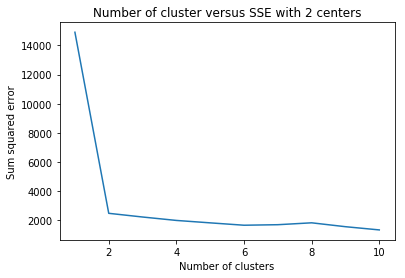

In [11]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=2000, centers=2, n_features=2,random_state=10)
cost_list = []
for i in range(1,11,1):
    kmeans = K_means(n_cluster=i)
    cluster, centroids = kmeans.fit(X)
    cost_list.append(kmeans.cost(cluster,centroids))

plt.title("Number of cluster versus SSE with 2 centers")
plt.xlabel("Number of clusters")
plt.ylabel("Sum squared error")
plt.plot([1,2,3,4,5,6,7,8,9,10],cost_list)
plt.show()

K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!
K-means training completed!


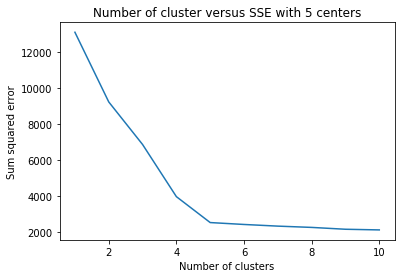

In [12]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=2000, centers=5, n_features=2,random_state=51)
cost_list = []
for i in range(1,11,1):
    kmeans = K_means(n_cluster=i)
    cluster, centroids = kmeans.fit(X)
    cost_list.append(kmeans.cost(cluster,centroids))

plt.title("Number of cluster versus SSE with 5 centers")
plt.xlabel("Number of clusters")
plt.ylabel("Sum squared error")
plt.plot([1,2,3,4,5,6,7,8,9,10],cost_list)
plt.show()